#  Analysis of Hospital Appointment No-Shows
# **Project Goal:** To analyze patient and appointment data to identify factors contributing to no-shows.
# **Data Source:** [Kaggle - Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments)


In [235]:
# Setup and Imports
# Import the pandas library, which is essential for data manipulation and analysis.
import pandas as pd

# Step: 2. Data Loading and Initial Inspection - Data Preparation
 First, we load the dataset from the CSV file and perform a quick inspection to understand its structure, data types, and to check for obvious issues like missing values.

In [236]:
# Load the dataset into a pandas DataFrame
# Make sure the .csv file is in the same directory as this notebook
df = pd.read_csv('KaggleV2-May-2016.csv')

# Display the first 5 rows to get a feel for the data
print("--- First 5 Rows of the Dataset ---")
df.head()

--- First 5 Rows of the Dataset ---


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [237]:
# Get a concise summary of the DataFrame, including data types and non-null counts
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Initial Observations from Inspection
 The dataset has 110,527 entries and 14 columns.
 There are no missing values, which is great.
 Some column names have typos or inconsistent casing (e.g., `Hipertension`, `Handcap`, `No-show`).
 `ScheduledDay` and `AppointmentDay` are currently `object` (text) types and need to be converted to `datetime` for proper analysis.

# Data Cleaning and Preparation
 In this step, we'll clean up the issues identified during inspection. This includes renaming columns, correcting data types, and removing any illogical data points.


In [238]:
# Rename columns for clarity and consistency
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'NoShow',
    'PatientId': 'PatientID',
    'AppointmentID': 'AppointmentID'
}, inplace=True)

# Convert date columns from 'object' to 'datetime'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Remove records with an invalid age (age < 0)
df = df[df['Age'] >= 0]

# --- Handle Duplicates ---
# Check for and remove any duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
# -----------------------------

print("\nData cleaning complete. Columns renamed, data types corrected, and invalid rows removed.")

Number of duplicate rows found: 0

Data cleaning complete. Columns renamed, data types corrected, and invalid rows removed.


## Verifying the Cleaned Data


In [239]:
# Verify that the data types have been corrected
print("\n--- Cleaned Dataset Info ---")
df.info()


--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hypertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64         

## Step 3: Exploratory Data Analysis (EDA)
# Now that our data is clean, we can start exploring it to find patterns and insights.

# We'll start by computing summary statistics for all numerical columns.

In [240]:
# Generate descriptive statistics for numerical columns
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Observations from Numerical Data
 **Age:** The average patient age is around 37 years. The range is from 0 to 115, which seems reasonable.
 
 **Chronic Conditions:** Since columns like `Hypertension` and `Diabetes` are binary (0 or 1), their `mean` represents the percentage of patients with that condition.
      
      **19.7%** of appointments are for patients with Hypertension.
      **7.2%** of appointments are for patients with Diabetes.

# Next, we'll analyze categorical columns to understand the distribution of key variables like the no-show rate and gender.

In [241]:
# Calculate the percentage of no-shows
no_show_percentage = df['NoShow'].value_counts(normalize=True) * 100
print("--- No-Show Percentage ---")
print(no_show_percentage)

--- No-Show Percentage ---
NoShow
No     79.806561
Yes    20.193439
Name: proportion, dtype: float64


In [242]:
# Calculate the gender distribution
gender_distribution = df['Gender'].value_counts()
print("\n--- Gender Distribution ---")
print(gender_distribution)


--- Gender Distribution ---
Gender
F    71839
M    38687
Name: count, dtype: int64


#  Observations from Categorical Data
**No-Show Rate:** The overall no-show rate is **20.2%**. This is a key metric for the hospital.

**Gender:** The dataset contains significantly more appointments for **females (65%)** than males (35%).

# Finally, let's examine the correlation between numerical variables to see how they relate to each other. A correlation matrix is a great tool for this.

In [243]:
# --- 3.3. Correlation Analysis ---

# Select only the columns with numerical data types
numerical_df = df.select_dtypes(include=['number'])

# Now, compute the correlation matrix on the numerical-only DataFrame
correlation_matrix = numerical_df.corr()

print("--- Correlation Matrix ---")
correlation_matrix

--- Correlation Matrix ---


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
PatientID,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.007915,-0.009742
AppointmentID,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
Hypertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
Handicap,-0.007915,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


# Observations from Correlation Matrix
 The strongest correlation is between **Age** and **Hypertension** (0.5), which is logical. As age increases, the likelihood of having hypertension also increases.
 Most other variables show very weak correlations with each other. For example, the correlation between receiving an `SMS_received` and any chronic condition is close to zero.
 `NoShow` is not in the correlation matrix because it is a categorical ('Yes'/'No') variable, not numerical. We will need other techniques to analyze its relationship with other variables.

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\3549711220.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NoShow', data=df, palette=['#5cb85c', '#d9534f'])


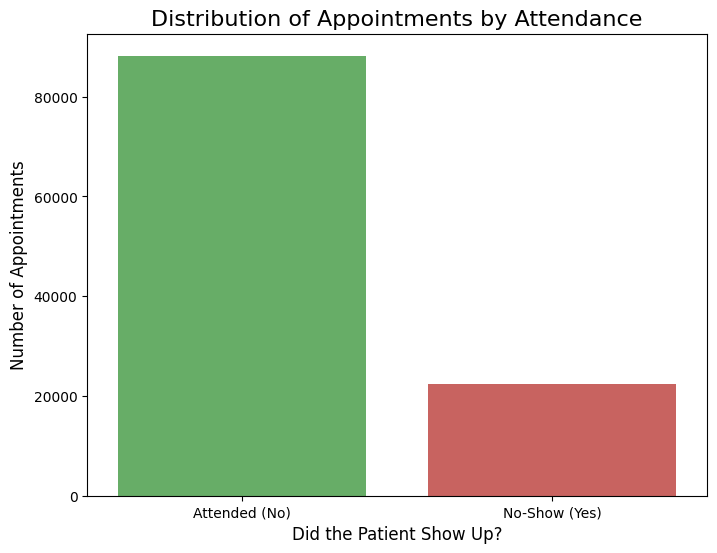

In [244]:
# Import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chart 1: No-Show Distribution ---

# Set the figure size for better readability
plt.figure(figsize=(8, 6))

# Create the count plot using seaborn
sns.countplot(x='NoShow', data=df, palette=['#5cb85c', '#d9534f'])

# Add a clear title and labels
plt.title('Distribution of Appointments by Attendance', fontsize=16)
plt.xlabel('Did the Patient Show Up?', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks([0, 1], ['Attended (No)', 'No-Show (Yes)']) # Make x-axis labels more descriptive

# Display the plot
plt.show()

# This bar chart answers the question: "What is the overall outcome of the appointments?"

 Its purpose is to establish the scale of the problem. Before we try to understand why patients don't show up, we first need to see how many don't show up.

    Insight: This chart immediately shows that while most people attend, the "no-show" group is very large and significant (over 20,000 appointments). It gives us the "big picture" and confirms that this is a problem worth investigating

<!-- bar chart answers the question: "What is the overall outcome of the appointments?"

Its purpose is to establish the scale of the problem. Before we try to understand why patients don't show up, we first need to see how many don't show up.

    Insight: This chart immediately shows that while most people attend, the "no-show" group is very large and significant (over 20,000 appointments). It gives us the "big picture" and confirms that this is a problem worth investigating -->

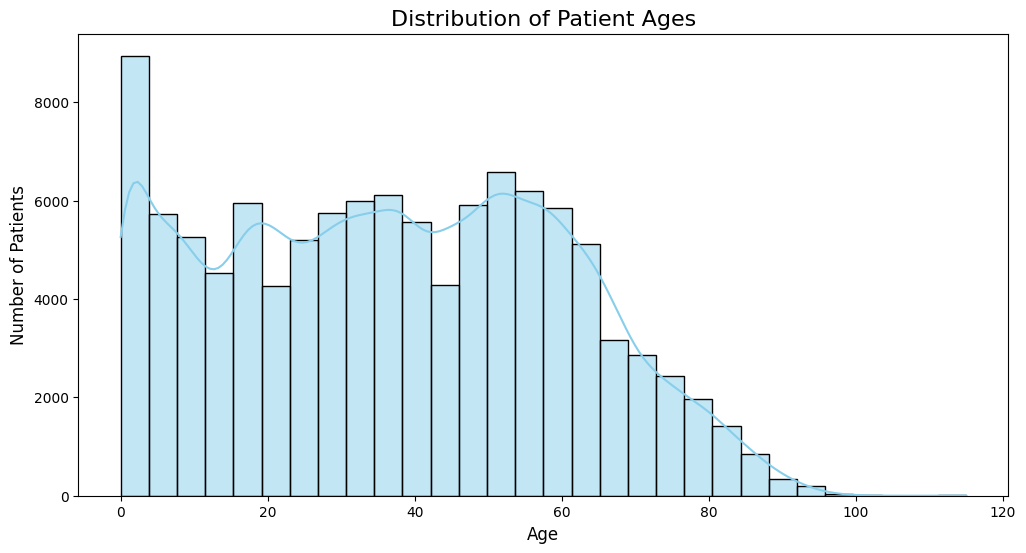

In [245]:
# --- Chart 2: Patient Age Distribution ---

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram using seaborn
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue')

# Add a title and labels
plt.title('Distribution of Patient Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Display the plot
plt.show()

# The histogram answers the question: "Who are the patients we are dealing with?"

 Its purpose is to understand the demographics of the patient population. A simple average age wouldn't tell us the full story. This chart reveals the underlying structure.

    Insight: We learned that the patient population isn't evenly distributed. There's a huge group of infants and a second large group of middle-aged adults. This is critical because different age groups might have very different behaviors. This chart gives us the context needed to ask deeper questions, like "Are no-shows more common in one age group than another?"

 If the bar chart was the headline, the histogram is the first paragraph of the story 📝. It introduces the main characters (the patients) and gives us crucial context.

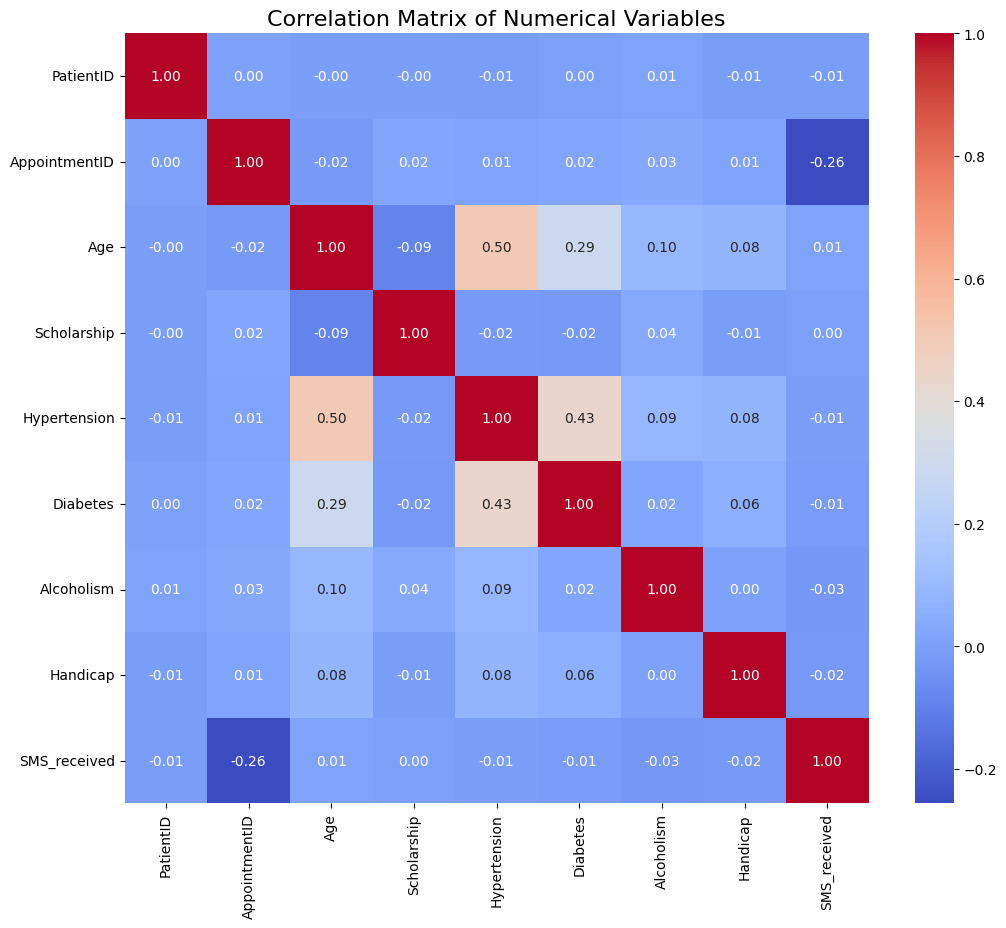

In [246]:
# --- Chart 3: Correlation Heatmap ---

# First, select only the numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)

# Display the plot
plt.show()

# This chart shows you the correlation between every pair of numerical variables.

Warm Colors (Red/Orange): Indicate a strong positive correlation. As one variable increases, the other tends to increase.

Cool Colors (Blue): Indicate a strong negative correlation. As one variable increases, the other tends to decrease.

Neutral Colors (White/Light Gray): Indicate little to no correlation.

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\3514255503.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_show_rate = df.groupby('AgeGroup')['NoShow_numeric'].mean() * 100
C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\3514255503.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_no_show_rate.index, y=age_no_show_rate.values, palette='viridis')


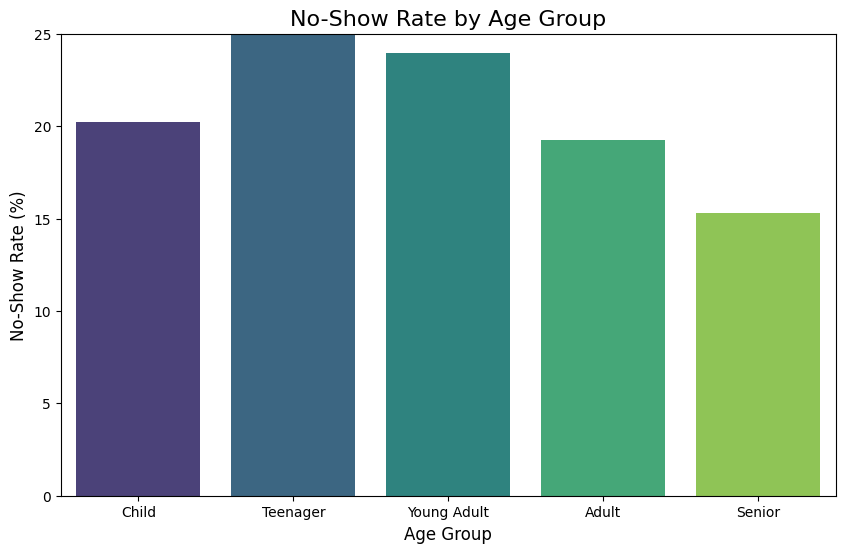

In [247]:
# --- Analysis: No-Show Rate by Age Group ---

# Step 1: Create age groups using pd.cut()
# Define the edges of our age bins
age_bins = [0, 12, 18, 35, 60, 120]
# Define the labels for these bins
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create the new 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Calculate the no-show rate for each age group
# We need to convert 'NoShow' ('Yes'/'No') to a numerical format (1/0) to calculate the mean
df['NoShow_numeric'] = df['NoShow'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by the new 'AgeGroup' and calculate the mean (which is now the no-show rate)
age_no_show_rate = df.groupby('AgeGroup')['NoShow_numeric'].mean() * 100

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=age_no_show_rate.index, y=age_no_show_rate.values, palette='viridis')

# Customize the plot
plt.title('No-Show Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.ylim(0, 25) # Set y-axis limit to better see the differences

# Display the plot
plt.show()

### Analysis: No-Show Rate by Age Group

**Question Answered:** Does a patient's age group affect their likelihood of missing an appointment?

**Key Findings:**
* The analysis reveals a clear relationship between age and appointment attendance.
* **Teenagers** and **Young Adults** have the highest no-show rates, both approaching 25%.
* The no-show rate for **Children** and **Adults** is lower, hovering around the dataset's average of 20%.
* **Seniors** are the most reliable group, with the lowest no-show rate at approximately 15%.

This is an excellent example of a specific, actionable insight. A hospital could use this information to create targeted reminder campaigns for the higher-risk age groups.

### Analysis: No-Show Rate by SMS Reminder

**Question:** Does receiving an SMS reminder have a noticeable impact on whether a patient shows up for their appointment?

Here, we'll isolate this variable and compare the no-show rates between patients who received an SMS and those who did not.

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\3052257571.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sms_no_show_rate.index, y=sms_no_show_rate.values, palette='coolwarm')


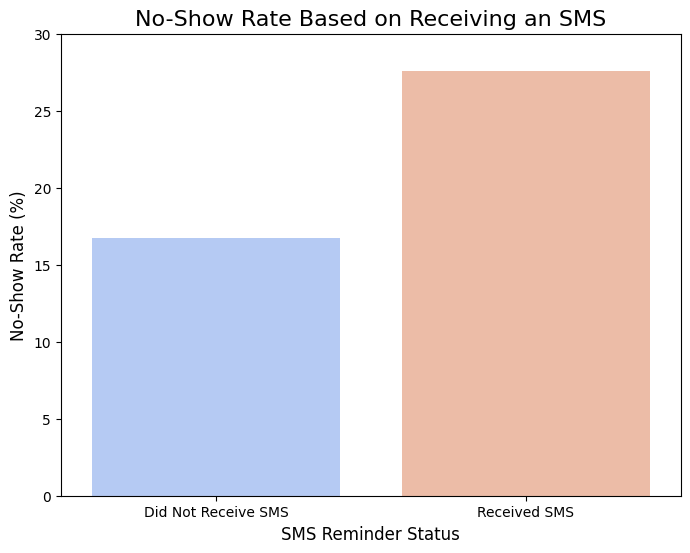

SMS_received
0    16.703534
1    27.574545
Name: NoShow_numeric, dtype: float64


In [248]:
# --- Analysis: No-Show Rate by SMS Reminder ---

# Group by the 'SMS_received' column and calculate the mean no-show rate
sms_no_show_rate = df.groupby('SMS_received')['NoShow_numeric'].mean() * 100

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=sms_no_show_rate.index, y=sms_no_show_rate.values, palette='coolwarm')

# Customize the plot
plt.title('No-Show Rate Based on Receiving an SMS', fontsize=16)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.xlabel('SMS Reminder Status', fontsize=12)
plt.xticks([0, 1], ['Did Not Receive SMS', 'Received SMS']) # Make x-axis labels descriptive
plt.ylim(0, 30)

# Display the plot
plt.show()

# Print the exact rates for clarity
print(sms_no_show_rate)

# Does a patient's health status affect their attendance?"

# We'll investigate if having chronic conditions like Hypertension or Diabetes changes the no-show rate. We can do this efficiently by creating two charts side-by-side.

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\4283831981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hypertension_rate.index, y=hypertension_rate.values, palette='Oranges', ax=ax1)
C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\4283831981.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['No', 'Yes'])
C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\4283831981.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_rate.index, y=diabetes_rate.values, palette='Blues', ax=ax2)
C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\4283831981.py:25: UserWarning: se

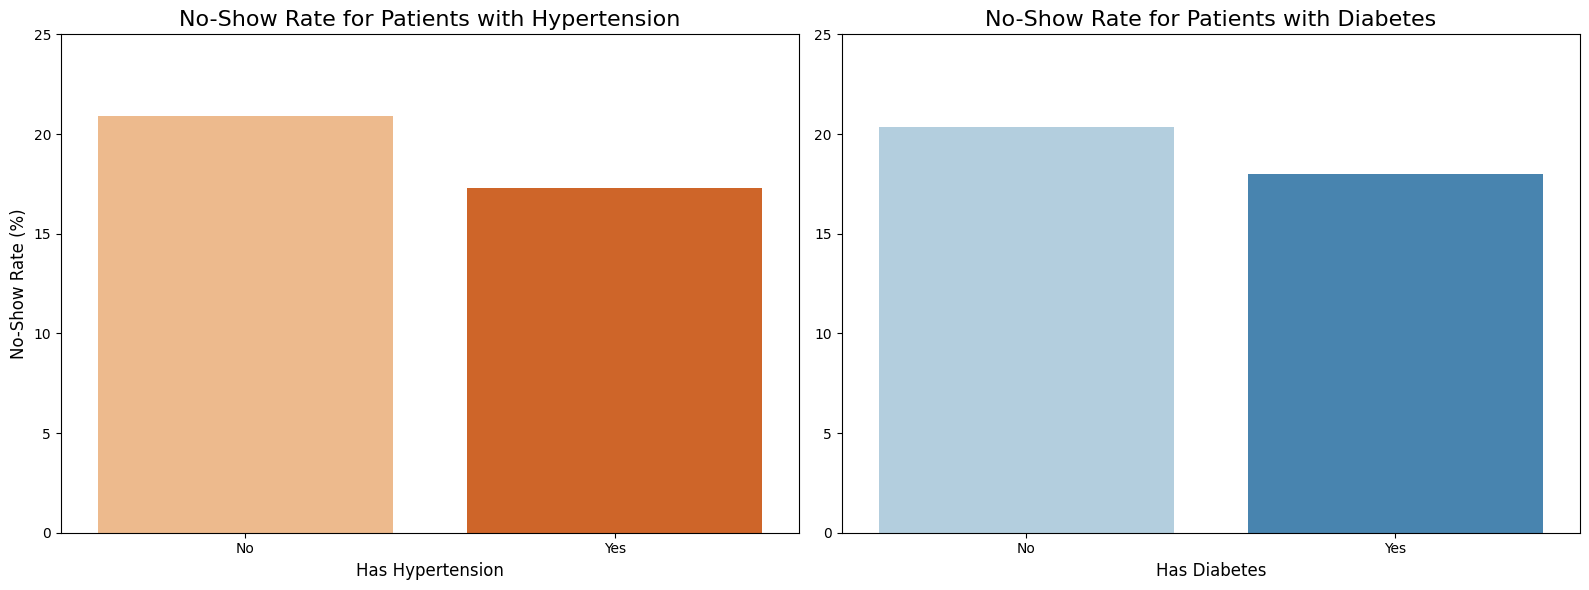

--- No-Show Rate by Hypertension ---
Hypertension
0    20.903917
1    17.301959
Name: NoShow_numeric, dtype: float64

--- No-Show Rate by Diabetes ---
Diabetes
0    20.363023
1    18.003273
Name: NoShow_numeric, dtype: float64


In [249]:
# --- Analysis: No-Show Rate by Chronic Condition ---

# Create a figure with two subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Hypertension ---
# Group by Hypertension and calculate no-show rate
hypertension_rate = df.groupby('Hypertension')['NoShow_numeric'].mean() * 100
# Create the bar plot on the first subplot (ax1)
sns.barplot(x=hypertension_rate.index, y=hypertension_rate.values, palette='Oranges', ax=ax1)
ax1.set_title('No-Show Rate for Patients with Hypertension', fontsize=16)
ax1.set_xlabel('Has Hypertension', fontsize=12)
ax1.set_ylabel('No-Show Rate (%)', fontsize=12)
ax1.set_xticklabels(['No', 'Yes'])
ax1.set_ylim(0, 25)

# --- Plot 2: Diabetes ---
# Group by Diabetes and calculate no-show rate
diabetes_rate = df.groupby('Diabetes')['NoShow_numeric'].mean() * 100
# Create the bar plot on the second subplot (ax2)
sns.barplot(x=diabetes_rate.index, y=diabetes_rate.values, palette='Blues', ax=ax2)
ax2.set_title('No-Show Rate for Patients with Diabetes', fontsize=16)
ax2.set_xlabel('Has Diabetes', fontsize=12)
ax2.set_ylabel('') # Hide y-label for cleaner look
ax2.set_xticklabels(['No', 'Yes'])
ax2.set_ylim(0, 25)

# Display the plots
plt.tight_layout() # Adjusts plots to prevent them from overlapping
plt.show()

# Print the exact rates for clarity
print("--- No-Show Rate by Hypertension ---")
print(hypertension_rate)
print("\n--- No-Show Rate by Diabetes ---")
print(diabetes_rate)

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\1448403697.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scholarship_rate.index, y=scholarship_rate.values, palette='plasma')


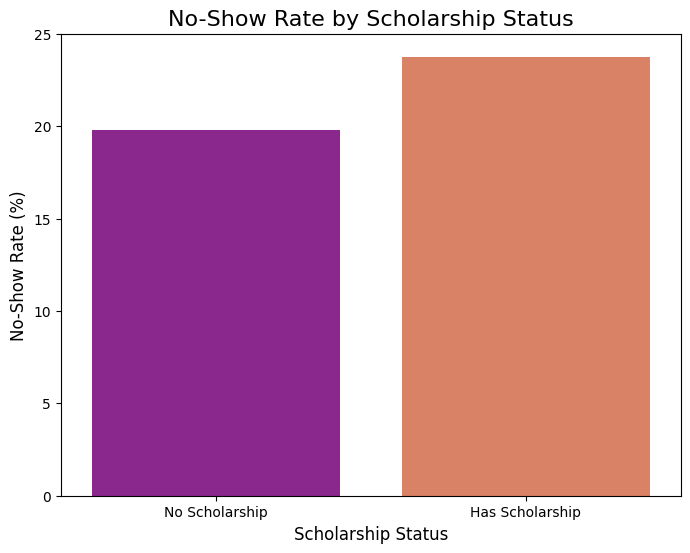

Scholarship
0    19.807355
1    23.736304
Name: NoShow_numeric, dtype: float64


In [250]:
# --- Analysis: No-Show Rate by Scholarship Status ---

# Group by Scholarship status and calculate the mean no-show rate
scholarship_rate = df.groupby('Scholarship')['NoShow_numeric'].mean() * 100

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=scholarship_rate.index, y=scholarship_rate.values, palette='plasma')

# Customize the plot
plt.title('No-Show Rate by Scholarship Status', fontsize=16)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.xlabel('Scholarship Status', fontsize=12)
plt.xticks([0, 1], ['No Scholarship', 'Has Scholarship'])
plt.ylim(0, 25)

# Display the plot
plt.show()

# Print the exact rates
print(scholarship_rate)

### Analysis: No-Show Rate by Scholarship Status

**Question:** Does a patient's scholarship status (enrollment in the Brasilian welfare program Bolsa Família) correlate with their appointment attendance?

**Key Findings:**
* The data shows that patients who are part of the scholarship program have a **noticeably higher no-show rate**.
* The no-show rate for patients **with a scholarship is approximately 23.7%**, while the rate for patients **without a scholarship is lower at 19.8%**.
* This is another interesting finding that suggests socioeconomic factors may play a role in appointment attendance.

C:\Users\Jason\AppData\Local\Temp\ipykernel_12944\1185993167.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_rate.index, y=gender_rate.values, palette='pastel')


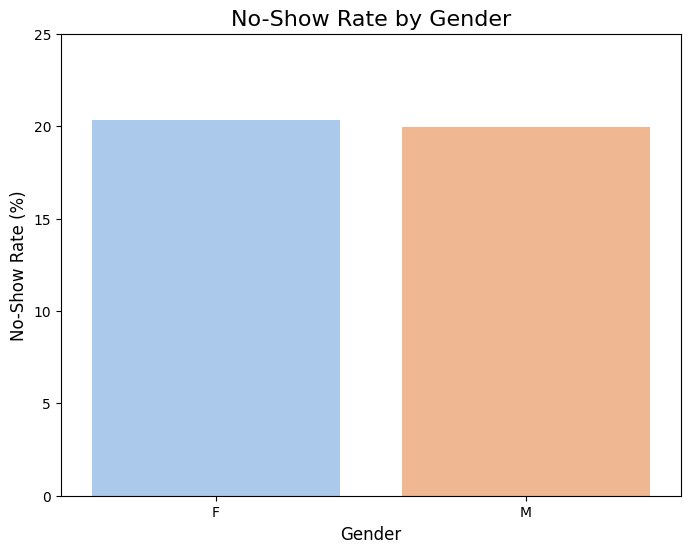

Gender
F    20.314871
M    19.967948
Name: NoShow_numeric, dtype: float64


In [251]:
# --- Analysis: No-Show Rate by Gender ---

# Group by Gender and calculate the mean no-show rate
gender_rate = df.groupby('Gender')['NoShow_numeric'].mean() * 100

# Visualize the results
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_rate.index, y=gender_rate.values, palette='pastel')

# Customize the plot
plt.title('No-Show Rate by Gender', fontsize=16)
plt.ylabel('No-Show Rate (%)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 25)

# Display the plot
plt.show()

# Print the exact rates
print(gender_rate)

### Analysis: No-Show Rate by Gender

**Question:** Is there a significant difference in the no-show rate between male and female patients?

**Key Findings:**
* Unlike other factors like age or scholarship status, gender does not appear to be a strong predictor of no-shows.
* The rates for both groups are nearly identical and close to the overall average:
    * **Females:** ~20.3% no-show rate.
    * **Males:** ~19.9% no-show rate.
* This suggests that any strategies to reduce no-shows should likely not be targeted based on gender.

key takeaways:

    Strongest Factors: Age is a major factor, with teenagers and young adults having the highest no-show rates. Scholarship status also has a significant impact, with recipients being more likely to miss appointments.

    Surprising Factor: The SMS reminders data was counter-intuitive, showing a higher no-show rate for those who received one, which suggests other hidden factors are at play.

    Less Significant Factors: Gender appears to have almost no influence. Chronic conditions like hypertension and diabetes have a small effect, with those patients being slightly more likely to attend.